<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/20230925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Cat & Dog 이미지의 CSV파일을 이용한 전체 이미지 학습

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/cat_dog_full_csv_train.csv')
display(df)  # 25000 rows × 6401 columns

t_data = df['label'].values.reshape(-1, 1)
x_data = df.drop('label', axis = 1, inplace = False).values

# 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
x_data_norm = scaler_x.transform(x_data)

# train test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm, t_data, test_size = 0.3)

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-93,-91,-90,-91,-90,-91,-91,-91,-90,-89,-90,-93,-91,-88,-87,-89,-90,-87,-86,-85,-84,-87,-87,-87,-87,-84,-82,-83,-81,-84,-83,-87,-81,-82,-82,-81,-80,-82,-82,...,106,109,114,116,115,118,121,-127,-125,-121,-120,-119,-118,-114,-114,-111,-112,-111,-112,-105,-100,-96,-96,-94,-95,-96,-90,-92,-93,-96,-98,-89,-92,-88,-87,-93,-91,-95,-88,-99
1,1,72,82,91,95,102,87,83,99,105,113,74,53,74,79,62,69,64,72,54,50,58,66,50,53,54,64,56,59,83,59,46,41,45,66,67,61,95,106,126,...,-109,-78,-118,98,113,-112,-119,-121,-113,-74,-85,-121,-117,-118,-91,-122,-92,124,127,-124,-81,-73,-104,-90,-103,125,-116,-123,-107,-111,-90,-72,-96,-96,-92,-91,-79,-76,-104,114
2,0,-128,125,122,114,117,114,120,127,126,127,-128,-128,-127,125,115,113,110,106,94,91,87,83,92,93,105,101,109,109,106,107,104,100,103,102,107,106,108,115,114,...,-98,-110,-98,-97,-93,-92,-84,-97,-102,-101,-91,-96,-96,-91,-97,-91,-87,-91,-82,-93,-67,-73,-85,-87,-82,-74,-81,-80,-74,-79,-69,-78,-69,-67,-77,-70,-76,-70,-74,-64
3,0,78,-49,-49,-93,-90,44,-1,-5,-8,-60,-56,-58,-29,75,-27,-26,32,-118,65,93,70,53,53,65,71,89,85,108,-124,-99,-62,-19,-9,98,-6,-3,-4,-3,-4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,50,53,51,55,53,59,56,68,70,62,61,35,59,44,43,31,38,40,40,46,42,57,61,67,66,-97,-65,-64,-60,-58,110,113,114,107,113,112,106,109,109,...,-72,58,55,61,51,49,-95,-83,-81,95,86,72,85,90,102,102,99,91,98,99,97,100,101,100,103,102,99,86,89,89,82,87,85,97,92,90,85,90,79,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,115,117,-126,112,-123,-117,120,121,-123,-119,-114,-124,127,114,126,118,-41,-21,-16,-14,-37,-87,-68,-123,102,118,103,104,-55,-68,-71,-80,-88,-120,-126,126,-106,91,-122,...,-69,-50,115,-71,-89,-76,-79,-60,-121,-106,-13,-44,-114,126,84,108,-128,95,119,100,90,-102,122,-124,124,-128,-37,117,-78,-119,-117,-105,-67,-110,121,-13,-3,-18,-103,-89
24996,0,10,41,53,47,9,11,14,11,12,9,10,9,19,18,22,30,54,83,101,121,-125,116,82,51,38,51,68,80,79,83,88,95,91,96,95,96,95,100,100,...,-127,96,62,-85,-34,-33,-40,-42,-89,-17,-10,-52,-11,-70,84,-46,-43,-39,-44,-49,-47,-47,-51,-60,-76,-96,-127,105,89,86,81,82,87,80,80,87,81,99,92,104
24997,0,60,56,56,53,44,47,42,43,48,43,51,44,61,61,58,60,58,55,72,61,75,73,65,59,70,75,77,80,77,68,70,72,72,69,71,72,76,70,78,...,-71,-61,-78,-74,-78,-88,-84,-98,-94,-82,-82,-83,-82,-89,-84,-86,-101,-107,-98,-109,-100,123,-122,123,124,125,122,111,106,103,109,110,109,104,98,101,86,87,79,79
24998,0,-36,-9,-16,-14,-14,-80,-21,-12,-12,-12,-7,-12,-54,-70,33,-27,-30,-39,-37,-40,-49,105,-54,-39,-38,-39,-46,120,-64,-40,-42,-37,-42,-40,73,-45,-34,-44,-30,...,-17,-15,-13,-4,-10,-5,-7,-10,-7,-9,-15,-13,-28,-24,-28,-25,-22,-28,-27,-32,-38,-43,-48,-42,-48,-44,-52,-52,-56,-54,-59,-63,-66,-68,-68,-69,-71,-72,-73,-76


In [7]:
# model 구현

model = Sequential()

# Feature Extraction
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 input_shape = (80, 80, 1)))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))


# 분류기
# input layer
model.add(Flatten())

# Dropout
model.add(Dropout(rate = 0.5))

# Hidden layer
model.add(Dense(units = 256,
                activation = 'relu'))

# Output layer
model.add(Dense(units = 1,
                activation = 'sigmoid'))

model.summary()
# Total params: 2764417 (10.55 MB)
# Trainable params: 2764417 (10.55 MB)
# Non-trainable params: 0 (0.00 Byte)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 40, 40, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)      

In [8]:
# 컴파일
model.compile(optimizer = Adam(learning_rate = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


# 학습진행
model_result = model.fit(x_data_train_norm.reshape(-1, 80, 80, 1),
                         t_data_train,
                         epochs = 100,
                         batch_size = 100,
                         verbose = 1,
                         validation_split = 0.3)

Epoch 1/100
123/123 [==============================] - 19s 46ms/step - loss: 0.6835 - accuracy: 0.5442 - val_loss: 0.6476 - val_accuracy: 0.6162
Epoch 2/100
123/123 [==============================] - 5s 39ms/step - loss: 0.6477 - accuracy: 0.6122 - val_loss: 0.6240 - val_accuracy: 0.6429
Epoch 3/100
123/123 [==============================] - 5s 38ms/step - loss: 0.6194 - accuracy: 0.6498 - val_loss: 0.5974 - val_accuracy: 0.6737
Epoch 4/100
123/123 [==============================] - 5s 37ms/step - loss: 0.5901 - accuracy: 0.6792 - val_loss: 0.5568 - val_accuracy: 0.7130
Epoch 5/100
123/123 [==============================] - 5s 39ms/step - loss: 0.5594 - accuracy: 0.7094 - val_loss: 0.5847 - val_accuracy: 0.6933
Epoch 6/100
123/123 [==============================] - 5s 38ms/step - loss: 0.5365 - accuracy: 0.7277 - val_loss: 0.5330 - val_accuracy: 0.7265
Epoch 7/100
123/123 [==============================] - 5s 38ms/step - loss: 0.5128 - accuracy: 0.7472 - val_loss: 0.5247 - val_accuracy

In [9]:
# Evaluation
print(model.evaluate(x_data_test_norm.reshape(-1, 80, 80, 1), t_data_test))
# [1.4138739109039307, 0.7798666954040527]

235/235 [==============================] - 2s 6ms/step - loss: 1.4139 - accuracy: 0.7799
[1.4138739109039307, 0.7798666954040527]


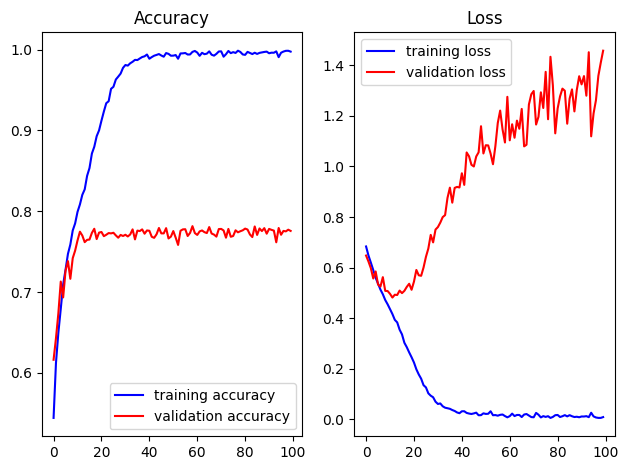

In [12]:
# train data로 학습 후 train data로 평가한 정확도(accuracy)
train_acc = model_result.history['accuracy']

# train data로 학습 후 train data로 평가한 loss
train_loss = model_result.history['loss']

# train data로 학습 후 validation로 평가한 정확도(accuracy)
val_acc = model_result.history['val_accuracy']

# train data로 학습 후 validation로 평가한 loss
val_loss = model_result.history['val_loss']

import matplotlib.pyplot as plt

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

fig_1.plot(train_acc, color='b', label='training accuracy')
fig_1.plot(val_acc, color='r', label='validation accuracy')
fig_1.set_title('Accuracy')
fig_1.legend()

fig_2.plot(train_loss, color='b', label='training loss')
fig_2.plot(val_loss, color='r', label='validation loss')
fig_2.set_title('Loss')
fig_2.legend()

plt.tight_layout()
plt.show()